# Pymaceuticals Inc.
### Analysis

- Effectiveness of Capomulin and Ramicane:
    - Capomulin and Ramicane showed the most consistent tumor volume reductions with tighter IQRs (7.31 and 8.33, respectively) and lower bounds of tumor volumes. This suggests they are the most effective in controlling tumor growth.

- Outliers in Tumor Volume:
    - Capomulin and Ramicane each had outliers (2 and 1, respectively), indicating that a small subset of subjects responded differently to these treatments. Infubinol and Ceftamin had no outliers, but they exhibited higher tumor volume ranges.

- Weight and Tumor Volume Correlation (Capomulin):
    - There is a strong positive correlation (R² = 0.90) between mouse weight and tumor volume under the Capomulin regimen. Heavier mice tended to have larger tumor volumes, suggesting weight may influence tumor growth or treatment effectiveness.

- Infubinol and Ceftamin:
    - These regimens displayed larger IQRs (10.00 for Infubinol and 9.59 for Ceftamin) and higher overall tumor volume ranges compared to Capomulin and Ramicane. This may indicate lower efficacy or higher variability in response among subjects.

- Statistical Significance of Tumor Volume Prediction:
    - The linear regression model for Capomulin (p-value ~1.0) shows a significant and reliable prediction of tumor volume based on mouse weight, highlighting the regimen's consistent and measurable impact.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "../Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "../Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df = pd.merge(study_results, mouse_metadata, on='Mouse ID')

# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
total_mice = mouse_study_df["Mouse ID"].nunique()
total_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse_id = mouse_study_df.loc[mouse_study_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_mouse_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_id_df = mouse_study_df.loc[mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mouse_data_df = mouse_study_df[mouse_study_df['Mouse ID'].isin(duplicate_mouse_id_df)]
duplicate_mouse_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mouse_clean_df = mouse_study_df[mouse_study_df["Mouse ID"].isin(duplicate_mouse_id_df)==False]
duplicate_mouse_clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
total_mice_clean = duplicate_mouse_clean_df['Mouse ID'].nunique()
total_mice_clean

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
drug_regimen_mean = duplicate_mouse_clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
drug_regimen_median = duplicate_mouse_clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
drug_regimen_variance = duplicate_mouse_clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
drug_regimen_std = duplicate_mouse_clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
drug_regimen_sem = duplicate_mouse_clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
drug_regimen_summary_df = pd.DataFrame({
    "Tumor Volume Mean": drug_regimen_mean, 
    "Tumor Volume Median": drug_regimen_median, 
    "Tumor Volume Variance": drug_regimen_variance, 
    "Tumor Volume Std. Dev.": drug_regimen_std, 
    "Tumor Volume Std. Err.": drug_regimen_sem})
drug_regimen_summary_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
single_line_stats = duplicate_mouse_clean_df.groupby('Drug Regimen')
# Using the aggregation method, produce the same summary statistics in a single line
drug_regimen_summary_single_line = single_line_stats['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
drug_regimen_summary_single_line

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Mouse ID / Timepoints')

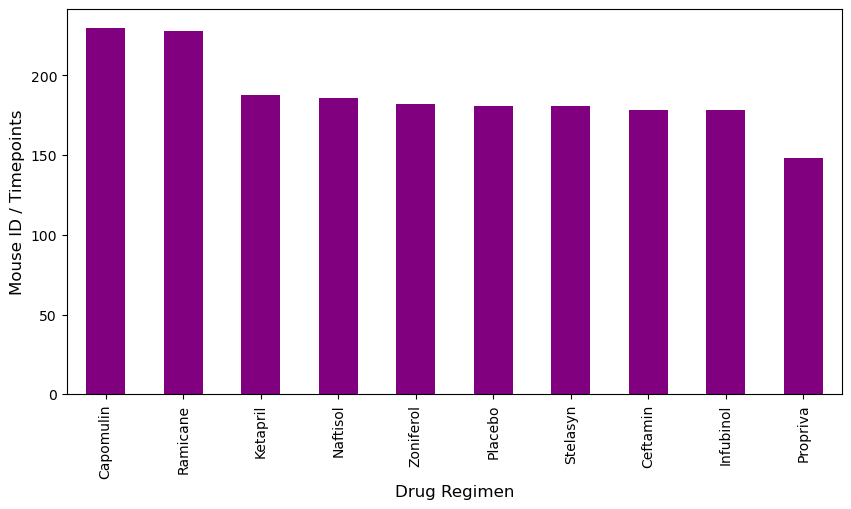

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_drug_bar_chart = duplicate_mouse_clean_df.groupby(["Drug Regimen"])["Mouse ID"].count().sort_values(ascending=False)
bar_plot_pandas = mouse_drug_bar_chart.plot.bar(color = 'purple', fontsize=10, rot=90, figsize=(10,5))
plt.xlabel("Drug Regimen", fontsize=12)
plt.ylabel("Mouse ID / Timepoints", fontsize=12)

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Timepoint, dtype: int64

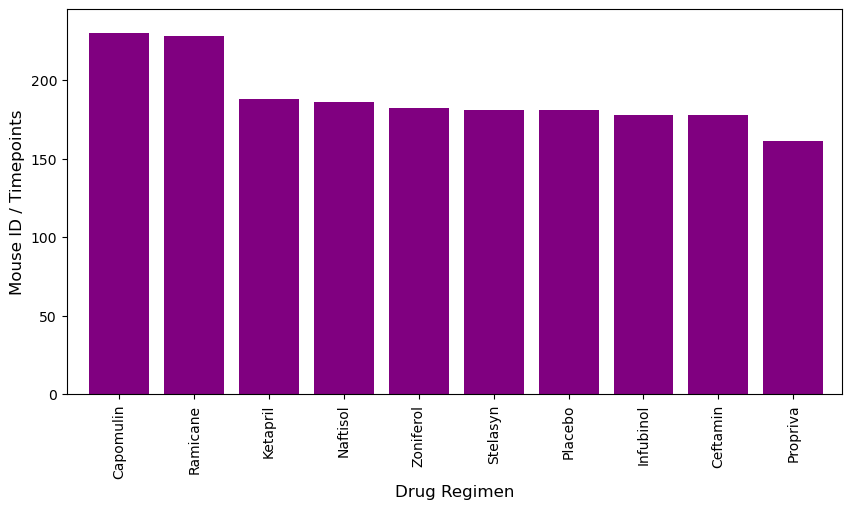

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
timepoints_per_drug =(mouse_study_df.groupby(["Drug Regimen"])["Timepoint"].count()).sort_values(ascending=False)
timepoints_per_drug
x_axis = np.arange(len(mouse_drug_bar_chart))
fig1, ax1 = plt.subplots(figsize=(10, 5))
plt.bar(x_axis,timepoints_per_drug, color='purple')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva'],  rotation='vertical')
plt.xlim(-0.7, len(x_axis)-0.35)
plt.ylim(0, max(timepoints_per_drug)+15)
plt.xlabel("Drug Regimen",fontsize = 12)
plt.ylabel("Mouse ID / Timepoints",fontsize = 12)
timepoints_per_drug

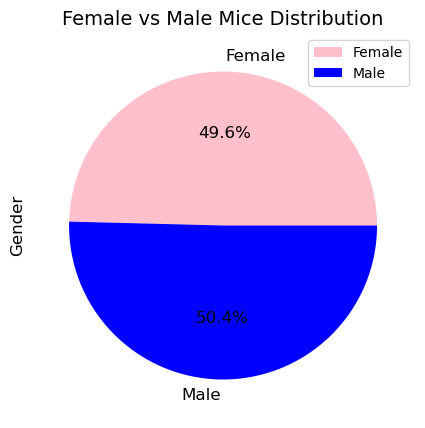

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
mouse_gender = duplicate_mouse_clean_df.groupby(["Mouse ID", "Sex"])
mouse_gender_df = pd.DataFrame(mouse_gender.size())
mice_gender = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
mice_gender.columns = ["Total Count"]

# Make the pie chart
colors = ['pink','blue']
mouse_gender_pie_chart = mice_gender.plot.pie(figsize=(10,5), y="Total Count", title= "Female vs Males Mice Distribution", fontsize= 12,autopct="%1.1f%%", colors= colors)
plt.title('Female vs Male Mice Distribution',fontsize = 14)
plt.ylabel('Gender',fontsize = 12)
plt.show()

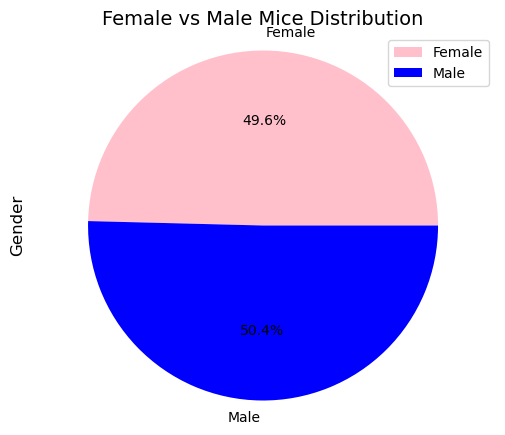

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
labels = ["Female","Male"]
total_gender_count = [123,125]

# Make the pie chart
fig1, ax1 = plt.subplots(figsize=(6, 5))
plt.pie(total_gender_count,labels=labels, autopct="%1.1f%%", colors= colors)
plt.title("Female vs Male Mice Distribution",fontsize = 14)
plt.ylabel("Gender", fontsize = 12)
plt.legend(["Female", "Male"])
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint_df = pd.DataFrame(duplicate_mouse_clean_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={"Timepoint": "max_Timepoint"})

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_df = pd.merge(duplicate_mouse_clean_df, greatest_timepoint_df, on='Mouse ID')
last_timepoint_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),max_Timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,f932,0,45.000000,0,Ketapril,Male,15,29,0
2,g107,0,45.000000,0,Ketapril,Female,2,29,35
3,a457,0,45.000000,0,Ketapril,Female,11,30,10
4,c819,0,45.000000,0,Ketapril,Male,21,25,40
...,...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25,45
1876,u364,45,31.023923,3,Capomulin,Male,18,17,45
1877,p438,45,61.433892,1,Ceftamin,Female,11,26,45
1878,x773,45,58.634971,4,Placebo,Female,21,30,45


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimen_list = ["Capomulin","Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
    # Determine outliers using upper and lower bounds
for treatment in drug_regimen_list:
    subset = last_timepoint_df[last_timepoint_df['Drug Regimen'] == treatment]
    q1 = subset['Tumor Volume (mm3)'].quantile(0.25)
    q3 = subset['Tumor Volume (mm3)'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = subset[(subset['Tumor Volume (mm3)'] < lower_bound) | (subset['Tumor Volume (mm3)'] > upper_bound)]
    print(f"Drug Regimen: {treatment}")
    print(f"IQR: {iqr}")
    print(f"# Of Outliers: {len(outliers)}")
    print(f"Lower Bound: {(lower_bound)}")
    print(f"Upper Bound: {(upper_bound)}")
    print("--------------------")
    tumor_volume_data.append(subset['Tumor Volume (mm3)'].values)


Drug Regimen: Capomulin
IQR: 7.314067135000002
# Of Outliers: 2
Lower Bound: 26.714832162499995
Upper Bound: 55.9711007025
--------------------
Drug Regimen: Ramicane
IQR: 8.325365415
# Of Outliers: 1
Lower Bound: 24.1865864625
Upper Bound: 57.488048122500004
--------------------
Drug Regimen: Infubinol
IQR: 10.002090667500006
# Of Outliers: 0
Lower Bound: 32.309217298749985
Upper Bound: 72.31757996875001
--------------------
Drug Regimen: Ceftamin
IQR: 9.593010457500007
# Of Outliers: 0
Lower Bound: 32.81891142624998
Upper Bound: 71.19095325625001
--------------------


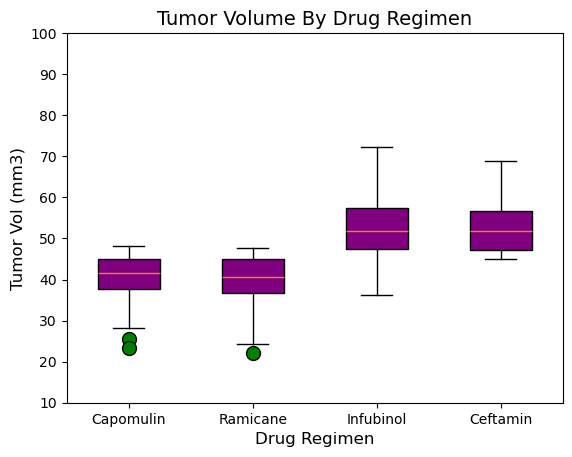

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
tumor_volume_distribution = dict(marker="o", markerfacecolor="green", markersize=10, markeredgecolor="black")
plt.boxplot(tumor_volume_data, widths=0.5, patch_artist=True, boxprops=dict(facecolor="purple"), flierprops=tumor_volume_distribution)
plt.title('Tumor Volume By Drug Regimen', fontsize= 14)
plt.xlabel('Drug Regimen', fontsize=12) 
plt.ylabel('Tumor Vol (mm3)', fontsize=12)
plt.xticks([1,2,3,4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.ylim(10, 100)
plt.show()

## Line and Scatter Plots

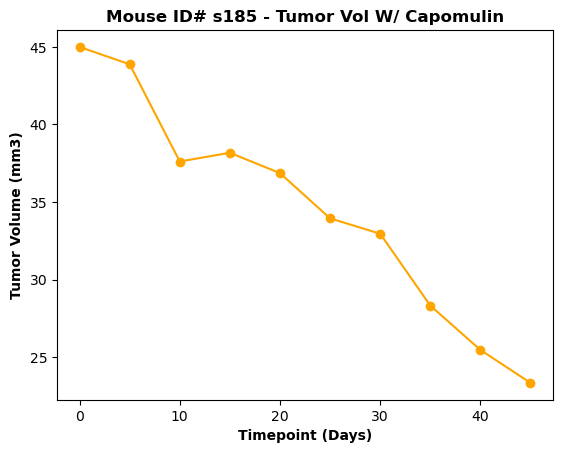

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = mouse_study_df.loc[mouse_study_df["Drug Regimen"] == "Capomulin",:]
mouse_id = 's185'
mouse_df = capomulin_df.loc[capomulin_df['Mouse ID'] == mouse_id]
time_vol = plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'], marker='o', color='orange')
plt.title(f"Mouse ID# {mouse_id} - Tumor Vol W/ Capomulin", fontweight='bold')
plt.xlabel('Timepoint (Days)', fontweight='bold')
plt.ylabel('Tumor Volume (mm3)', fontweight='bold')
plt.show()

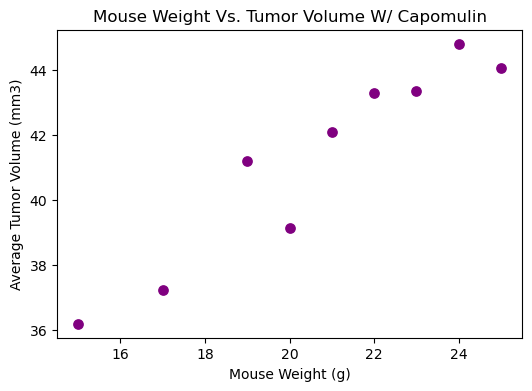

,Weight (g),Tumor Volume (mm3)
0,15,36.182040
1,17,37.214133
2,19,41.182391
3,20,39.141053
4,21,42.088700
5,22,43.288490
6,23,43.341051
7,24,44.805810
8,25,44.062109


In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_tumor_volume = capomulin_df.groupby('Weight (g)')['Tumor Volume (mm3)'].mean()
plt.figure(figsize=(6, 4)) 
plt.scatter(avg_tumor_volume.index, avg_tumor_volume.values, s=45, c='purple', alpha=1)  
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight Vs. Tumor Volume W/ Capomulin')
plt.show()

avg_tumor_volume_df = pd.DataFrame(avg_tumor_volume)
avg_tumor_volume_df

new_avg_tumor_volume_df = avg_tumor_volume_df.reset_index()
new_avg_tumor_volume_df

## Correlation and Regression

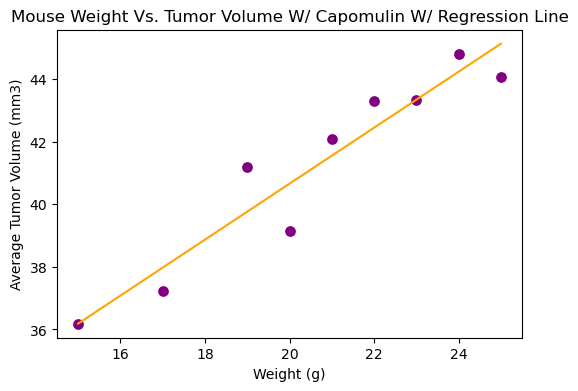

Slope (m): 0.8947726097340611
Y-intercept (b): 22.764229983591935
Standard error of the estimate (SE): 1.0249929158261613
R-squared: 0.9034966277438602
P-value: 0.9999999999999923
Linear Equation: y = 0.8947726097340611(X) + 22.764229983591935


In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
m, b = np.polyfit(avg_tumor_volume.index, avg_tumor_volume.values, 1)
plt.figure(figsize=(6, 4)) 
plt.scatter(avg_tumor_volume.index, avg_tumor_volume.values, s=45, c='purple', alpha=1)
plt.plot(avg_tumor_volume.index, m * avg_tumor_volume.index + b, color='orange')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight Vs. Tumor Volume W/ Capomulin W/ Regression Line')
plt.show()

residuals = new_avg_tumor_volume_df['Tumor Volume (mm3)'] - (m * new_avg_tumor_volume_df['Weight (g)'] + b)
sse = np.sum(residuals**2)
df_freedom = len(new_avg_tumor_volume_df) - 2
mse = sse / df_freedom
se = np.sqrt(mse)
r_squared = 1 - (sse / np.sum((new_avg_tumor_volume_df['Tumor Volume (mm3)'] - new_avg_tumor_volume_df['Tumor Volume (mm3)'].mean())**2))
from scipy import stats
t_stat, p_value = stats.ttest_rel(new_avg_tumor_volume_df['Tumor Volume (mm3)'], (m * new_avg_tumor_volume_df['Weight (g)'] + b))

print(f"Slope (m): {m}")
print(f"Y-intercept (b): {b}")
print(f"Standard error of the estimate (SE): {se}")
print(f"R-squared: {r_squared}")
print(f"P-value: {p_value}")
print(f"Linear Equation: y = {m}(X) + {b}")